lumi_EE [87238.34252816073, 77708.24903427745, 59961.10069465639]
errorlumi_EE [0.0014576390284737877, 0.0014338144313216206, 0.0017108643900726483]
bril [116086.333, 100081.51, 93398.989]


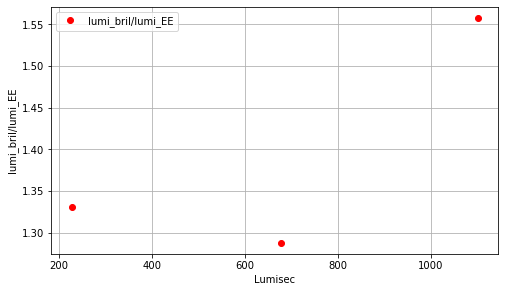

In [2]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

# Function to calculate L
def calculate_L(N1, N2, N1_prime, N2_prime, constant_value_1):
    term1 = (1 / constant_value_1)
    term2 = ((2 * N2 + N1) *(2 * N2_prime + N1_prime)) / (4*N2 * N2_prime)
    term3 = ((2 * N2 + N1) **2) / (4*N2)
    return term1 * term2 * term3

# Function to calculate (delta L / L)^2
def calculate_delta_L_over_L_squared(N1, N2, N1_prime, N2_prime, delta_N1, delta_N2, delta_N1_prime, delta_N2_prime, constant_value_2, constant_value_3):
    term1 = 3 * (delta_N2 / N2) ** 2
    term2 = (delta_N2_prime / N2_prime) ** 2
    term3 = (4 * (delta_N2) ** 2 + (delta_N1) ** 2) / ((2 * N2 + N1) ** 2)
    term4 = (4 * (delta_N2_prime) ** 2 + (delta_N1_prime) ** 2) / ((2 * N2_prime + N1_prime) ** 2)
    return term1 + term2 + term3 + term4 + constant_value_2 + constant_value_3

# Load data from text files
def load_data(file_list):
    return [np.loadtxt(file) for file in file_list]

# File names for inputs
N1_files = ["N_1hee1.txt", "N_1hee2.txt", "N_1hee3.txt"]
N2_files = ["N_2hee1.txt", "N_2hee2.txt", "N_2hee3.txt"]
N1_prime_files = ["N_1Iee1.txt", "N_1Iee2.txt", "N_1Iee3.txt"]
N2_prime_files = ["N_2Iee1.txt", "N_2Iee2.txt", "N_2Iee3.txt"]
delta_N1_files = ["eN_1hee1.txt", "eN_1hee2.txt", "eN_1hee3.txt"]
delta_N2_files = ["eN_2hee1.txt", "eN_2hee2.txt", "eN_2hee3.txt"]
delta_N1_prime_files = ["eN_1Iee1.txt", "eN_1Iee2.txt", "eN_1Iee3.txt"]
delta_N2_prime_files = ["eN_2Iee1.txt", "eN_2Iee2.txt", "eN_2Iee3.txt"]

# Load all input data for the first set
N1 = load_data(N1_files)
N2 = load_data(N2_files)
N1_prime = load_data(N1_prime_files)
N2_prime = load_data(N2_prime_files)
delta_N1 = load_data(delta_N1_files)
delta_N2 = load_data(delta_N2_files)
delta_N1_prime = load_data(delta_N1_prime_files)
delta_N2_prime = load_data(delta_N2_prime_files)

# Constants
constant_value_1 = (2.018*0.106)
constant_value_2 =  0.00000369
constant_value_3 =  0.000141 

# Calculate L and (delta L / L)^2 for the first set of inputs
L_values1 = []
delta_L_over_L_squared_values1 = []
for i in range(len(N1)):
    L = calculate_L(N1[i], N2[i], N1_prime[i], N2_prime[i], constant_value_1)
    delta_L_squared = calculate_delta_L_over_L_squared(
        N1[i], N2[i], N1_prime[i], N2_prime[i], delta_N1[i], delta_N2[i], delta_N1_prime[i], delta_N2_prime[i],
        constant_value_2, constant_value_3
    )
    L_values1.append(L)
    delta_L_over_L_squared_values1.append(delta_L_squared)


# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 42, 83
x_bin_start3, x_bin_end3 = 83, 120

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]

# Plot the results
plt.figure(figsize=(8, 10))
print("lumi_EE",L_values1)
print("errorlumi_EE",delta_L_over_L_squared_values1)

lbril_values = [116086.333 , 100081.51 , 93398.989]
rat = [lbril_values[0]/L_values1[0], lbril_values[1]/L_values1[1] , lbril_values[2]/L_values1[2]]


print("bril",lbril_values)

# Plot L
plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, rat , fmt='o', color='red',  capsize=5,label="lumi_bril/lumi_EE")

plt.xlabel("Lumisec")
plt.ylabel("lumi_bril/lumi_EE")
plt.legend()
plt.grid()
plt.show()
